<a href="https://colab.research.google.com/github/Nadia-Chen/CNN_Flower/blob/main/CNN_Flower.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

/content/drive/MyDrive/flower/Training
(240, 320, 3)
[[[232 241 212]
  [237 245 232]
  [230 242 230]
  ...
  [165  68  85]
  [125  50  91]
  [121  54  95]]

 [[240 248 224]
  [244 252 241]
  [236 248 238]
  ...
  [123  29  45]
  [126  50  76]
  [133  57 103]]

 [[240 247 229]
  [244 252 241]
  [238 248 237]
  ...
  [120  32  48]
  [134  58  70]
  [135  53  99]]

 ...

 [[ 77  75  36]
  [ 70  65  33]
  [ 76  70  48]
  ...
  [136 113 121]
  [135 114 121]
  [134 115 121]]

 [[ 73  68  38]
  [ 71  65  41]
  [ 82  74  55]
  ...
  [140 119 128]
  [138 118 129]
  [135 118 128]]

 [[ 76  68  47]
  [ 76  67  50]
  [ 87  75  59]
  ...
  [141 121 132]
  [137 119 131]
  [135 119 130]]]


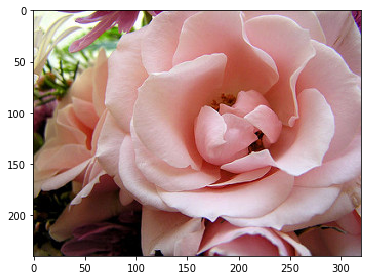

In [6]:
train_root  = "/content/drive/MyDrive/flower/Training"
test_root = "/content/drive/MyDrive/flower/Test"
print(train_root)

from skimage import io
image = io.imread("/content/drive/MyDrive/flower/Training/rose/12240303_80d87f77a3_n.jpg")
print(image.shape)
print(image) 
io.imshow(image)

batch_size = 10

In [7]:
from keras.preprocessing.image import ImageDataGenerator

Generator = ImageDataGenerator()
train_data = Generator.flow_from_directory(train_root, (100, 100), batch_size=batch_size)
test_data = Generator.flow_from_directory(test_root, (100, 100), batch_size=batch_size)

#optional
print(train_data[0][0][0].shape)
# total 4317 data below to 5 clasess
print(len(train_data)) #4317/batch size
print(len(train_data[0])) #2, 1st image, 2nd is label
#print(train_data[0])
print(len(train_data[0][0])) #1st batch of 10 data
print(len(train_data[0][0][0])) #the image, the vertical
print(len(train_data[0][0][0][0])) #the image, the horizontal
print(len(train_data[0][0][0][0][0])) #the image, RGB


Found 4317 images belonging to 5 classes.
Found 4317 images belonging to 5 classes.
(100, 100, 3)
432
2
10
100
100
3


5


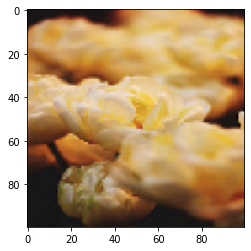

In [8]:
import tensorflow as tf
from matplotlib.pyplot import imshow
import os

im = train_data[0][0][1]
img = tf.keras.preprocessing.image.array_to_img(im)
imshow(img)

num_classes = len([i for i in os.listdir(train_root)])
print(num_classes)

In [4]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

model = Sequential()

model.add(Conv2D(16, (5, 5), input_shape=(100, 100, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(32, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(64, (5, 5),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Conv2D(128, (5, 5), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides=2))
model.add(Dropout(0.05))

model.add(Flatten())

model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.05))

model.add(Dense(num_classes, activation="softmax"))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 96, 96, 16)        1216      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 48, 48, 16)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 48, 48, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 44, 44, 32)        12832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 22, 22, 32)        0

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = batch_size, epochs=4)

Epoch 1/4
432/432 [==============================] - 1715s 4s/step - loss: 1.7737 - accuracy: 0.3665
Epoch 2/4
432/432 [==============================] - 23s 54ms/step - loss: 1.2297 - accuracy: 0.4739
Epoch 3/4
432/432 [==============================] - 23s 54ms/step - loss: 1.1209 - accuracy: 0.5372
Epoch 4/4
432/432 [==============================] - 23s 54ms/step - loss: 1.0563 - accuracy: 0.5756


In [6]:
# score = model.evaluate(train_data)
# print(score)
score = model.evaluate(test_data)
print(score)

432/432 [==============================] - 1486s 3s/step - loss: 0.9506 - accuracy: 0.6264
[0.9506243467330933, 0.6263608932495117]


In [10]:
# Using Resnet
import keras
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.models import Model

restnet = ResNet50(include_top=False, weights='imagenet', input_shape=(100,100,3))
restnet.summary()

from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers
model = Sequential()
model.add(restnet)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])
model.fit(train_data, batch_size = 20, epochs=2)

score = model.evaluate(test_data)
print(score)

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 100, 100, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 106, 106, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 50, 50, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 50, 50, 64)   256         ['conv1_conv[0][0]']      